# 소셜 네트워크 분석

## 1. 소셜 네트워크 등장배경
- 소셜 미디어의 등장과 확산: 관계 중심

## 2. 네트워크 이론 
### 2.1. 개요
- 네트워크: 각각의 객체들이 상호 연결된 구조
- 구성요소: 노드와 링크
 - 노드(Node): 고유한 속성을 가지고 있는 행위자
 - 링크(Link): 노드들간의 관계

### 2.2. 유형
- 방향성 유무: 방향 vs 무방향
- 가중치 유무: 가중 vs 이진
- 관계 위상 형태: Ring, Mesh, **Star**, Bus, ect... 
- 네트워크 크기(노드,링크 규모): Micro, Meso, Macro, Super-mecro
- 분석 대상: 전체 vs 하위 
 - 파당: 모든 노드들이 상호간에 직접적으로 연결(완전 연결). **3개 이상의 노드를 포함한 것**
 - 클러스타: 유사한 속성을 가지고 있는 노드들의 집합

### 2.3. 분석 지표
- 네트워크 수준  
 - 크기: 네트워크를 구성하는 노드들의 수. 크기 증가할수록 구조의 복잡성 증가
 - 밀도: 네트워크를 구성하고 있는 노드들 간의 연결된 정도. 
 - 포괄성: 네트워크상의 총 노드의 개수 중에서 실제로 연결 관계가 존재하는 노드의 개수가 차지하는 비율 (밀집도를 노드의 관점에서)
 - 상호성: 방향 네트워크 상에서 2개의 노드 간의 연결이 쌍방향인 경우. 전체 네트워크 상에서 상호적 연결이 차지하고 있는 비율로 산출
 - 군집화 계수: 해당 노드의 이웃 노드들 간에 가능한 최대 관계의 수 중에서 실제로 존재하는 관계의 수가 차지하는 비율로 정의
- 노드 수준
 - 연결정도: 해당 노드에 직접 연결되어 있는 노드(혹은 링크)의 개수. 연결정도가 높을수록 다른 노드들과 많은 관계를 가지고 있으며 이는 높은 활동성과 영향력을 반증.
 - 연결거리: 노드간 링크(연결)의 강도. 두 노드간 연결 거리가 짧을수록 노드간의 연결이 높아짐. +) 직경, 평균연결거리

## 3. 중심성 지표 
- 전체 네트워크에서 중심에 위치하는 정도. 가장 많이 사용되는 지표
- 중요한 역할을 하는 노드가 무엇인지 파악 가능 -> 효율적인 정보 전달과 의사전달을 가능케함

### 3.1. 연결정도 중심성
- 네트워크 상에서 한 노드가 얼마나 많은 연결 관계를 가지고 있는지 측정
- 노드는 많은 연결 관계를 가질수록 더 넓은 선택의 폭과 자율성을 가지게 되며, 다른 노드에 대한 의존성을 낮춤 -> 네트워크에서 큰 영향력
### 3.2. 근접 중심성
- 네트워크 상의 노드들 간의 근접도를 기준.
- 해당 노드가 전체 네트워크 상에서 얼마나 중앙에 위치하고 있는지 측정
### 3.3. 매개 중심성
- 특정 노드가 다른 노드들의 중간에서 얼마나 중개자 및 매개자 역할을 하고 있는지 측정
- 매개 중심성이 높은 노드는 정보 및 자원의 흐름에 있어서 높은 통제력을 확보하며, 관계 연결의 길목에서 정보를 왜곡, 관계 활동 방해로 네트워크를 위협할 수 있음
### 3.4. 아이겐 벡터 중심성 
- 직접 연결된 다른 노드들의 개수 뿐만 아니라 연결된 다른 노드들의 **중요도** 또한 함께 반영한 것
- 소수 몇몇 영향력 높은 노드들에 연결되어 있는 것이 다수의 일반 노드들에 연결되어 있는 것보다 더 큰 영향력을 가짐 

## 4. 실습코드
- 데이터: '수원' 기사 제목 크롤링(2019)


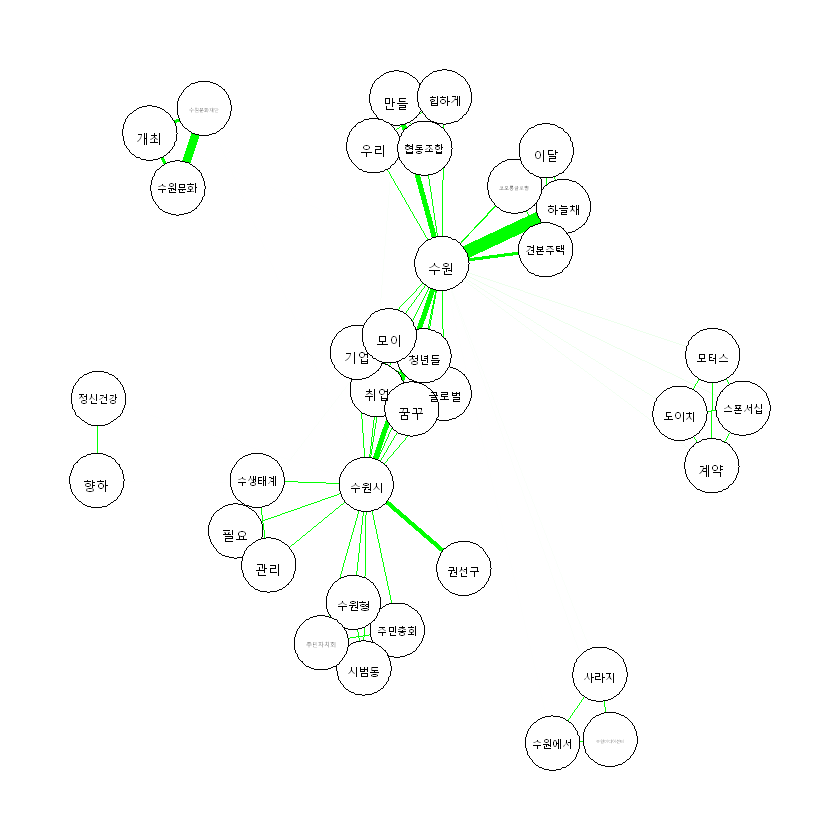

In [6]:
# 패키지 설치
library(tm)
library(KoNLP)
library(stringr)
library(qgraph)

options(mc.cores=1)

# 한글 형태소 분석 함수 
dics <- c('sejong','woorimalsam')
ko.words <- function(doc) {
  d <- as.character(doc) 
 # 명사 추출
  pos <- paste(SimplePos09(d))
  ex <- str_match(pos, '([가-힣]+)/[NP]')
  keyword <- ex[,2]
  keyword <- keyword[!is.na(keyword)] # 결측값 제거 
  paste(keyword, collapse = ' ')
}

# 데이터 읽어오기
txt <- readLines("기사제목(수원).txt")

# 텍스트마이닝 분석하기
words <- lapply(txt, ko.words)
cps <- Corpus(VectorSource(words))
tdm <- TermDocumentMatrix(cps, control = list(removePunctuation=T, removeNumbers=T))
tdm.matrix <- as.matrix(tdm)

# 단어의 빈도수 분석을 통해 키워드 찾기
word.count <- rowSums(tdm.matrix)
word.order <- order(word.count, decreasing = T)
freq.words <- tdm.matrix[word.order[1:50],] 
freq.words <- subset(freq.words, str_length(row.names(freq.words))>=2) 
keyword.df <- data.frame(rownames(freq.words), rowSums(freq.words))

# 네트워크로 시각화
co.matrix <- freq.words %*% t(freq.words)
qgraph(co.matrix, labels=rownames(co.matrix), diag=F, layout='spring', edge.color='green') 

- 무방향 가중 네트워크. Mesh 형태
- 노드의 수: 36개, 링크의 수: 46개
- 3-노드 파당, 4-노드 파당 존재
- (수원문화), (모터스,도이치), (취업,청년,기업), (하늘채,주택) 등 군집 존재 
- 연결정도 중심성에 따르면 **'수원시'** 와 **'수원'** 이 큰 영향력
